# Creating Trapezoidal Prisms Using Arbitrary Cross Sections

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bluemira.magnetostatics.polyhedral_prism import PolyhedralPrismCurrentSource
from bluemira.magnetostatics.trapezoidal_prism import TrapezoidalPrismCurrentSource
from bluemira.utilities.plot_tools import Plot3D
from bluemira.display import plot_3d
from bluemira.base.constants import raw_uc
from bluemira.base.constants import MU_0

### Test for cube against theory

Below are 2 plots of a cube producedby the new and old prism current source classes to see whether they are identical so field checks between the two will be for the same shape. The dot is the fieldpoint where the field will be tested at.

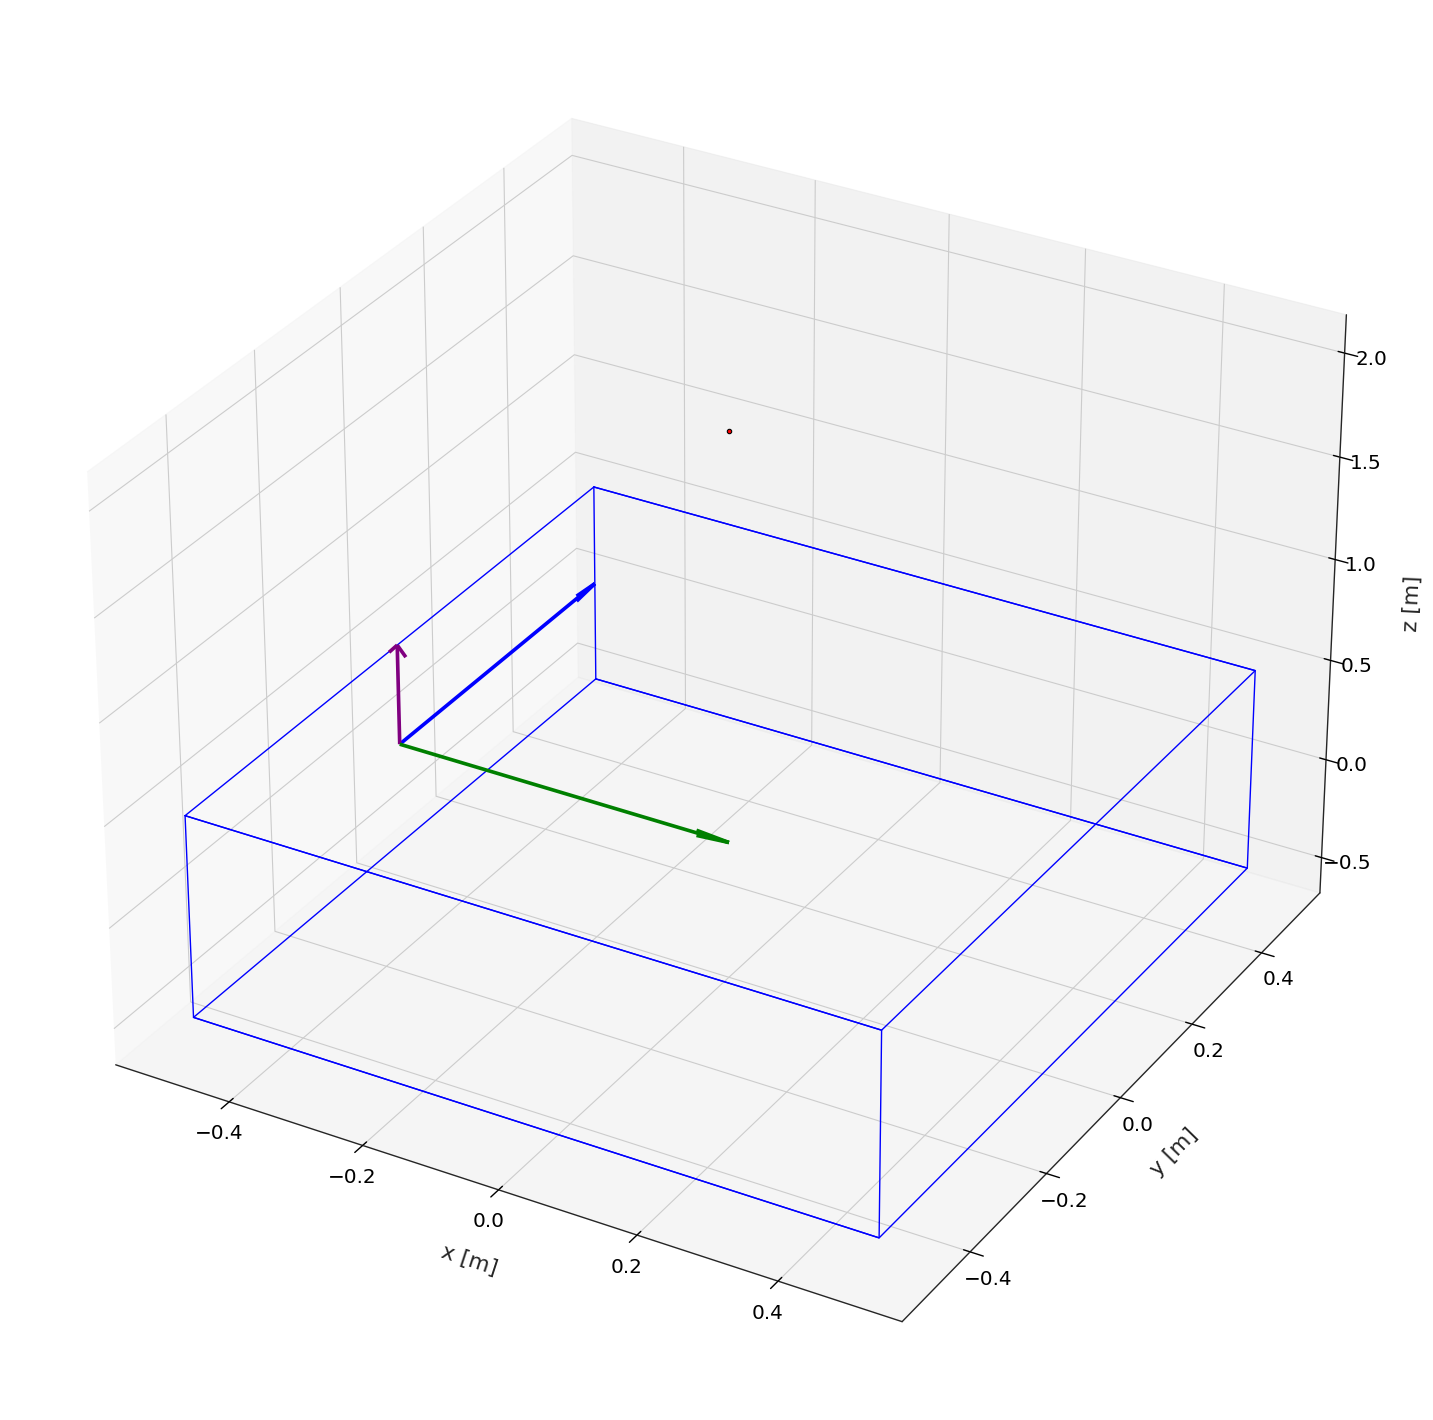

[[-0.5 -0.5  0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]
 [ 0.5 -0.5  0.5]
 [-0.5 -0.5  0.5]]


In [2]:
source = PolyhedralPrismCurrentSource(
    np.array([-0.5, 0.5, 0.5]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    4,
    1.0,
    np.pi * 2 / 4,
    np.pi * 2 / 4,
    np.pi / 2,
    "ext",
    4e5,
)
fieldpoint = np.array([0, 0, 2])
ax = Plot3D()
source.plot(ax=ax)

# current direction
ax.quiver(
    source.X[0],
    source.X[1],
    source.X[2],
    source.J_hat[0],
    source.J_hat[1],
    source.J_hat[2],
    length=0.5,
    normalize=True,
    color="green",
    arrow_length_ratio=0.1,
)
# magnetisation direction
ax.quiver(
    source.X[0],
    source.X[1],
    source.X[2],
    source.Mc_hat[0],
    source.Mc_hat[1],
    source.Mc_hat[2],
    length=0.5,
    normalize=True,
    color="blue",
    arrow_length_ratio=0.1,
)

# magnetisation value direction
ax.quiver(
    source.X[0],
    source.X[1],
    source.X[2],
    source.D_hat[0],
    source.D_hat[1],
    source.D_hat[2],
    length=0.5,
    normalize=True,
    color="purple",
    arrow_length_ratio=0.1,
)
plot_3d(fieldpoint, ax=ax)
plt.show()
print(source.points[3, :, :])

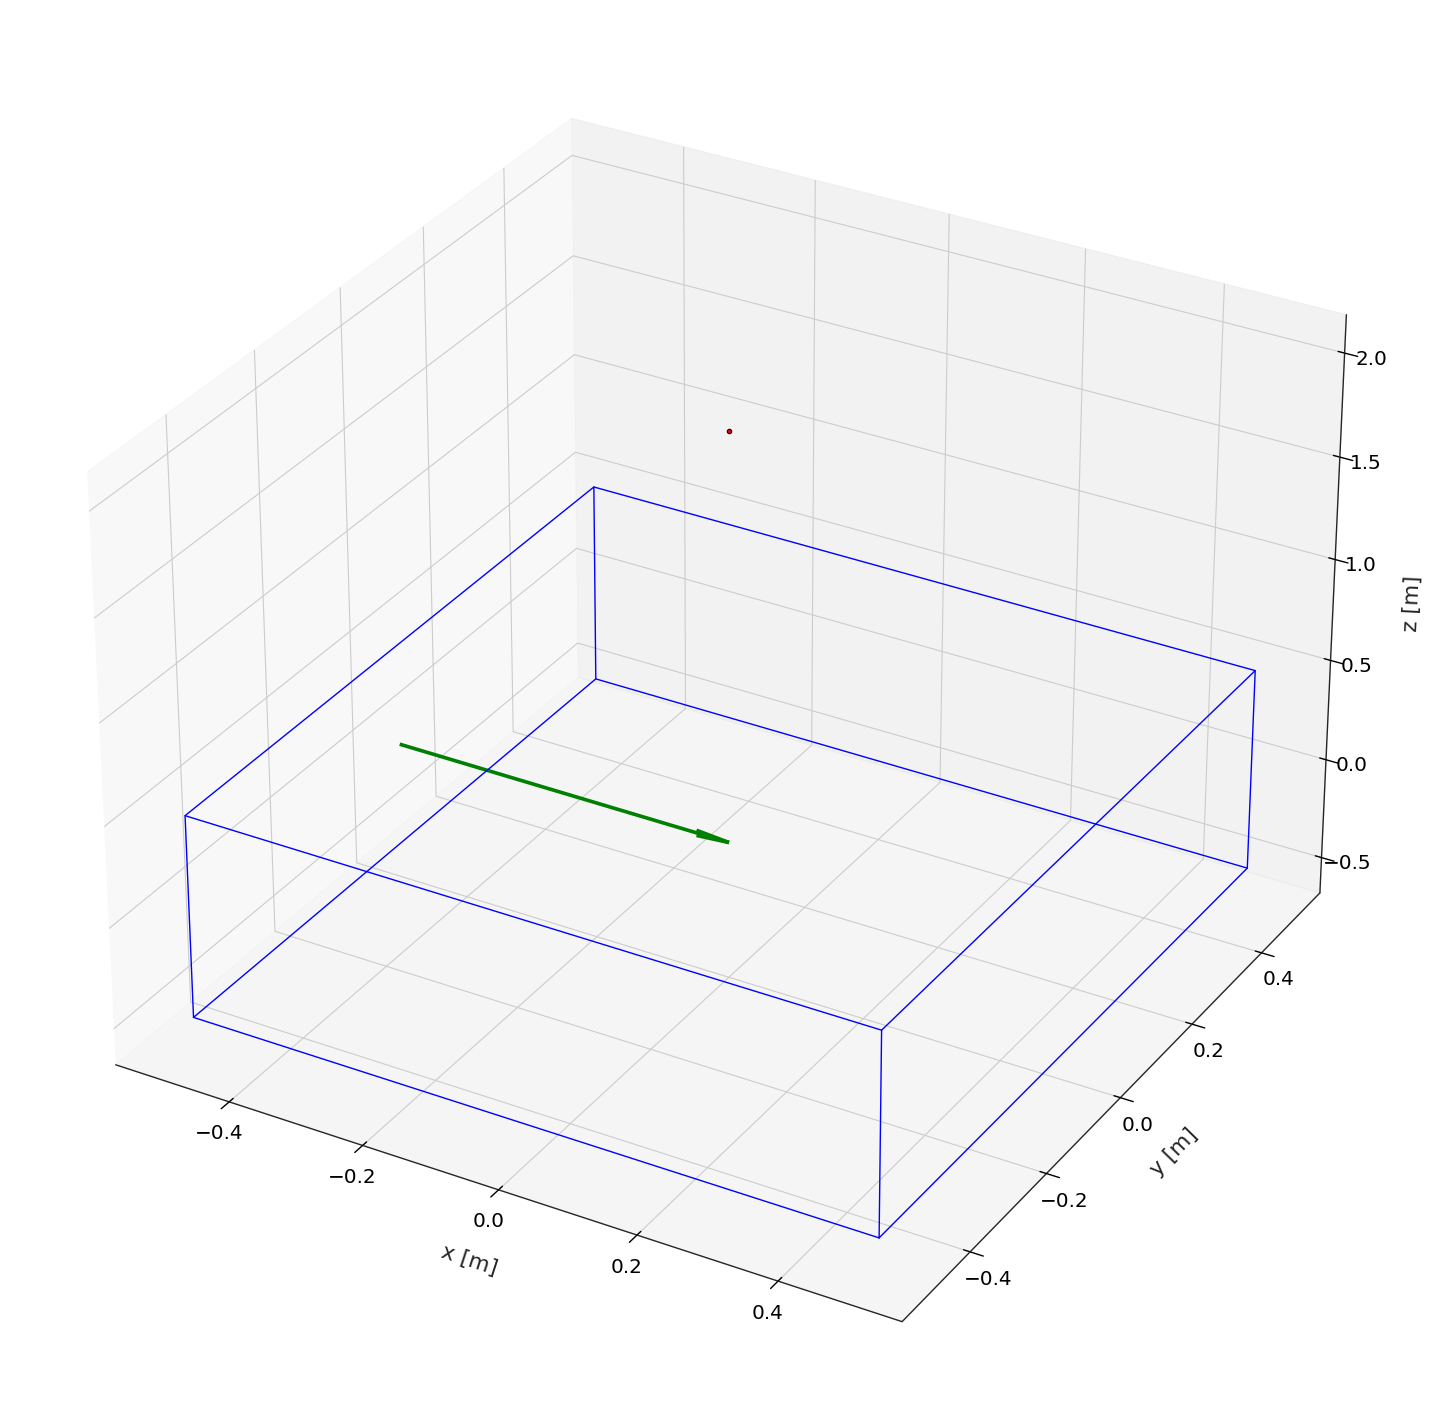

In [3]:
source2 = TrapezoidalPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1]),
    0.5,
    0.5,
    np.pi * 4 / 4,
    np.pi * 4 / 4,
    4e5,
)
ax = Plot3D()
source2.plot(ax=ax)
ax.quiver(
    -0.5,
    0,
    0,
    1,
    0,
    0,
    length=0.5,
    normalize=True,
    color="green",
    arrow_length_ratio=0.1,
)
plot_3d(fieldpoint, ax=ax)
plt.show()

Can see a cube with side length of 1 (m) centred at (0,0,0) and a fieldpoint at (0,0,2). For this magnet some of the initial parameters are found below:

$$
J = 4e5 \hat{J}, \\
\hat{J} = (1,0,0) \\
\hat{M} = (0,1,0) \\
\hat{D} = (0,0,1)
$$

where $\hat{J}$ is the current direction (green arrow), $\hat{M}$ is the magnetisation direction (blue arrow) and $\hat{D}$ is the magnetisation value direction (purple arrow) such where the value of M is dependent upon the distance in the $\hat{D}$ direction between an arbitrary point and the point M is being measured at multiplied by the current J.

The total flux density (B) at the fieldpoint can be calculated by summing the magnetic field density (H) contributions at the fieldpoint from each side of the magnet and then converting to B. For a given side the x, y and z components of the H field are as follows:

$$
H_x = \frac{J}{4 \pi}([n_2 D - n_1 (n_1 x + n_2 y)] \lambda + [n_1 D - n_1 (-n_2 x + n_1 y)] \gamma - n_1 n_2 \psi) \\
H_y = \frac{J}{4 \pi}(-[n_1 D - n_1 (-n_2 x + n_1 y)] \lambda + [n_2 D - n_1 (n_1 x + n_2 y)] \gamma + n_1^2 \psi) \\
H_z = \frac{J}{4 \pi}(n_1 D \eta - n_1^2 \zeta)
$$

D is the distance from the arbitrary point O (-0.5,0,0) to the edge (k-1,k) for a side k ie starting point for side creation. $n_1$ is the cosine of the angle between the side normal $\hat{n_k}$ and $\hat{M}$. $n_2$ is the cosine of the angle between $\hat{n_k}$ and $\hat{D}$. The other terms are all found by using the vector form of various equations for a side k which has points $p_1$ to $p_4$ anf fieldpoint $p_f$ and are:

$$
\vec{R_i} = p_f - p_i, \, i = 1,2,3,4 \\
\vec{l_{ij}} = \vec{R_i} - \vec{R_j}, \, j = 1,2,3,4 \\
d = (l_{12}^2 - z_2^2)^{1/2} \\
\hat{x} = (\vec{l_{12}} \times \hat{z}) / d \\
\hat{y} = \hat{z} \times \hat{x} \\
\hat{z} = \vec{l_{14}} / l_{14} \\
x = \hat{x} \cdot \vec{R_1} \\
y = \hat{y} \cdot \vec{R_1} \\
z = \hat{z} \cdot \vec{R_1} \\
z_p = \hat{z} \cdot \vec{l_{1p}}, \, p = 2,3,4 \\
P_{12} = \hat{x} \cdot (\vec{R_1} \times \vec{R_2}) \\
P_{34} = -\hat{x} \cdot (\vec{R_3} \times \vec{R_4}) \\
Q_{12} = \vec{R_1} \cdot \vec{l_{12}} \\
Q_{34} = -\vec{R_4} \cdot \vec{l_{34}} \\
\lambda_{12} = ln(\frac{R_1 l_{12} - Q_{12}}{(R_2 + l_{12}) l_{12} - Q_{12}}) \\
\lambda_{34} = ln(\frac{(R_3 + l_{34}) l_{34} - Q_{34}}{R_4 l_{34} - Q_{34}}) \\
\lambda = ln(\frac{(R_1 + z)(R_3 + z - z_3)}{(R_2 + z - z_2)(R_4 + z - z_4)}) + \frac{z_2}{l_{12}}\lambda_{12} + \frac{z_3 - z_4}{l_{34}} \lambda_{34} \\
\gamma = \tan^{-1}A - \tan^{-1}B + \tan^{-1}C - \tan^{-1}D \\
A = \frac{z Q_{12} - z_2 R_1^2}{x R_1 d} \\
B = \frac{(z - z_2)(Q_{12} - l_{12}^2) - z_2 R_2^2}{x R_2 d} \\
C = \frac{(z - z_3)(Q_{34} - l_{34}^2) - (z_3 - z_4) R_3^2}{x R_3 d} \\
D = \frac{(z - z_4) Q_{34} - (z_3 - z_4) R_4^2}{x R_4 d} \\
\psi = \frac{d z_2}{l_{12}^2} (R_1 - R_2) + \frac{d (z_3 - z_4)}{l_{34}^2} (R_3 - R_4) - d^2 (\frac{P_{12} \lambda_{12}}{l_{12}^3} + \frac{P_{34} \lambda_{34}}{l_{34}^3}) \\
\eta = d (\frac{\lambda_{12}}{l_{12}} + \frac{\lambda_{34}}{l_{34}}) \\
\zeta = d^2 (\frac{R_1 - R_2}{l_{12}^2} + \frac{R_3 - R_4}{l_{34}^2} + \frac{Q_{12} \lambda_{12}}{l_{12}^3} + \frac{Q_{34} \lambda_{34}}{l_{34}^3})
$$



For the cube the faces are the sides with x at -0.5 and 0.5 whilst the sides k = 1, 2, 3, 4 are according to the image the back, bottom, front and top respectively. For the cube faces the value of $n_1$ and $n_2$ are 0 meaning that there is no contribution from them. For the sides k=2,4 $n_1$ is zero whilst $n_2$ is -1 and 1 respectively. 

Starting with side k=2 the H equations become:

$$
H_x = \frac{J}{4 \pi}(-D \lambda) \\
H_y = \frac{J}{4 \pi}(-D \gamma) \\
H_z = 0 
$$

For the vector equations we get the following:

$$
p_1 = (-0.5,0.5,-0.5), \, p_2 = (-0.5, -0.5, -0.5), \, p_3 = (0.5, -0.5, -0.5), \, p_4 = (0.5, 0.5, -0.5) \\
\vec{R_1} = (0.5, -0.5, 2.5), \, \vec{R_2} = (0.5, 0.5, 2.5), \, \vec{R_3} = (-0.5, 0.5, 2.5), \, \vec{R_4} = (-0.5, -0.5, 2.5) \\
\vec{l_{12}} = (0, -1, 0), \, \vec{l_{13}} = (1, -1, 0), \, \vec{l_{14}} = (1, 0, 0), \, \vec{l_{34}} = (0, 1, 0) \\
\hat{z} = (1,0,0), \, z_2 = 0, \, z_3 = 1, \, z_4 = 1, \, d = 1 \\
\hat{x} = (0,0,1), \, \hat{y} = (0,-1,0), \, x = 2.5, \, y = 0.5, \, z = 0.5 \\
P_{12} = (0,0,1) \cdot (-2.5,0,0.5) = 0.5, \, P_{34} = -(0,0,1) \cdot (2.5,0,0.5) = -0.5 \\
Q_{12} = 0.5, \, Q_{34} = 0.5, \, R_1 = R_2 = R_3 = R_4 \therefore \lambda = 0 \\
A = C = -B = -D = \frac{1}{15 (3)^{1/2}}, \, \gamma = \tan^{-1}(A) - \tan^{-1}(-A) + \tan^{-1}(A) - \tan^{-1}(-A) = 2(\tan^{-1}(A) - \tan^{-1}(-A)) = 4 \tan^{-1}(A) \\
$$

This leaves:

$$
H = (0,H_y,0) = (0,-JD \tan^{-1}(A),0)  = (0,2e5/\pi \times 0.038,0)
$$

Side k=4 the H equations become:

$$
H_x = \frac{J}{4 \pi}(D \lambda) \\
H_y = \frac{J}{4 \pi}(D \gamma) \\
H_z = 0 
$$

For the vector equations we get the following:

$$
p_1 = (-0.5,-0.5,0.5), \, p_2 = (-0.5, 0.5, 0.5), \, p_3 = (0.5, 0.5, 0.5), \, p_4 = (0.5, -0.5, 0.5) \\
\vec{R_1} = (0.5, 0.5, 1.5), \, \vec{R_2} = (0.5, -0.5, 1.5), \, \vec{R_3} = (-0.5, -0.5, 1.5), \, \vec{R_4} = (-0.5, 0.5, 1.5) \\
\vec{l_{12}} = (0, 1, 0), \, \vec{l_{13}} = (1, 1, 0), \, \vec{l_{14}} = (1, 0, 0), \, \vec{l_{34}} = (0, -1, 0) \\
\hat{z} = (1,0,0), \, z_2 = 0, \, z_3 = 1, \, z_4 = 1, \, d = 1 \\
\hat{x} = (0,0,-1), \, \hat{y} = (0,1,0), \, x = -1.5, \, y = 0.5, \, z = 0.5 \\
P_{12} = 0.5, \, P_{34} = -0.5 \\
Q_{12} = 0.5, \, Q_{34} = 0.5, \, R_1 = R_2 = R_3 = R_4 \therefore \lambda = 0 \\
A = C = -B = -D = -\frac{1}{3 (11)^{1/2}}, \, \gamma = \tan^{-1}(A) - \tan^{-1}(-A) + \tan^{-1}(A) - \tan^{-1}(-A) = 2(\tan^{-1}(A) - \tan^{-1}(-A)) = 4 \tan^{-1}(A) \\
$$

This leaves:

$$
H = (0,H_y,0) = (0,JD/\pi \tan^{-1}(A),0)  = (0,-2e5/\pi \times 0.1,0)
$$

Sides k=1,3 $n_1$ is 1 and -1 respectively whilst $n_2$ is 0 for both. 

For k=1:
$$
H_x = \frac{J}{4 \pi} (-x \lambda + [D - y] \gamma) \\
H_y = \frac{J}{4 \pi} (-[D - y] \lambda -x \gamma + \psi \\
H_z = \frac{J}{4 \pi}(D \eta - \zeta)
$$

$$
D = 1/2
p_1 = (-0.5,0.5,0.5), \, p_2 = (-0.5, 0.5, -0.5), \, p_3 = (0.5, 0.5, -0.5), \, p_4 = (0.5, 0.5, 0.5) \\
\vec{R_1} = (0.5, -0.5, 1.5), \, \vec{R_2} = (0.5, -0.5, 2.5), \, \vec{R_3} = (-0.5, -0.5, 2.5), \, \vec{R_4} = (-0.5, -0.5, 1.5) \\
\vec{l_{12}} = (0, 0, -1), \, \vec{l_{13}} = (1, 0, -1), \, \vec{l_{14}} = (1, 0, 0), \, \vec{l_{34}} = (0, 0, 1) \\
\hat{z} = (1,0,0), \, z_2 = 0, \, z_3 = 1, \, z_4 = 1, \, d = 1 \\
\hat{x} = (0,-1,0), \, \hat{y} = (0,0,-1), \, x = 0.5, \, y = -1.5, \, z = 0.5 \\
P_{12} = 0.5, \, P_{34} = -0.5 \\
Q_{12} = -1.5, \, Q_{34} = -1.5 \\
R_1 = R_4 \& R_2 = R_3, \, \therefore \lambda = ln[\frac{(R_1 + 1/2)(R_2 - 1/2)}{(R_1 - 1/2)(R_2 + 1/2)}] = 0.233 \\
A = -D \& B = -C \, \therefore \gamma = 2(\tan^{-1}(A) - \tan^{-1}(B)) = 0.062 \\
\lambda_{12} = -\lambda_{34} \, \therefore \psi = -\lambda_{12} = 0.479, \, \& \eta = 0, \, \zeta = 0
$$

This results in H field:

$$
H_x = \frac{J}{4 \pi} (-1/2 \lambda + 2 \gamma) = \frac{1e5}{\pi} (0.123 - 0.117) = 0.005 \frac{1e5}{\pi} \\
H_y = \frac{J}{4 \pi} (-2 \lambda -1/2 \gamma + \psi = \frac{1e5}{\pi} (-0.466 - 0.031 + 0.479) = -0.018 \frac{1e5}{\pi} \\
H_z = 0
$$

For k=3:
$$
H_x = \frac{-J}{4 \pi} (x \lambda + [D + y] \gamma) \\
H_y = \frac{J}{4 \pi} ([D + y] \lambda - x \gamma + \psi \\
H_z = \frac{-J}{4 \pi}(D \eta + \zeta)
$$

$$
D = -1/2
p_1 = (-0.5,-0.5,-0.5), \, p_2 = (-0.5, -0.5, 0.5), \, p_3 = (0.5, -0.5, 0.5), \, p_4 = (0.5, -0.5,- 0.5) \\
\vec{R_1} = (0.5, 0.5, 2.5), \, \vec{R_2} = (0.5, 0.5, 1.5), \, \vec{R_3} = (-0.5, 0.5, 1.5), \, \vec{R_4} = (-0.5, 0.5, 2.5) \\
\vec{l_{12}} = (0, 0, 1), \, \vec{l_{13}} = (1, 0, 1), \, \vec{l_{14}} = (1, 0, 0), \, \vec{l_{34}} = (0, 0, -1) \\
\hat{z} = (1,0,0), \, z_2 = 0, \, z_3 = 1, \, z_4 = 1, \, d = 1 \\
\hat{x} = (0,1,0), \, \hat{y} = (0,0,1), \, x = 0.5, \, y = 2.5, \, z = 0.5 \\
P_{12} = 0.5, \, P_{34} = -0.5 \\
Q_{12} = 2.5, \, Q_{34} = 2.5 \\
R_1 = R_4 \& R_2 = R_3, \, \therefore \lambda = ln[\frac{(R_1 + 1/2)(R_2 - 1/2)}{(R_1 - 1/2)(R_2 + 1/2)}] = -0.233 \\
A = -D \& B = -C \, \therefore \gamma = 2(\tan^{-1}(A) - \tan^{-1}(B)) = 0.062 \\
\lambda_{12} = -\lambda_{34} \, \therefore \psi = -\lambda_{12} = -0.479, \, \& \eta = 0, \, \zeta = 0
$$

This results in H field:

$$
H_x = \frac{-J}{4 \pi} (1/2 \lambda + 2 \gamma) = -\frac{1e5}{\pi} (0.0075) =  \\
H_y = \frac{J}{4 \pi} (2 \lambda - 1/2 \gamma + \psi) = -\frac{1e5}{\pi} (0.976) \\
H_z = 0
$$

This gives the combined H field from all the components as:

$$
H_x = \frac{1e5}{200 \pi} + 0 - \frac{3e5}{400 \pi} + 0 = -\frac{1}{400 \pi}e5 = -0.0008e5 \\
H_y = -\frac{9e5}{500 \pi} + \frac{19e5}{250 \pi} - \frac{122e5}{125 \pi} - \frac{1e5}{5 \pi} = -\frac{541}{500 \pi}e5 = 0.344e5 \\
H_z = 0 + 0 + 0 + 0 = 0
$$

Converting this to magnetic flux density with $B = \mu_0 H$:

In [10]:
Bx = -0.0008e5 * MU_0
By = 0.344e5 * MU_0
Bz = 0.0 * MU_0
B = 1000 * np.sqrt(Bx**2 + By**2 + Bz**2)
print("B_x:", Bx)
print("B_y:", By)
print("B_z:", Bz)
print("B:", B)

B_x: -0.00010053096497000481
B_y: 0.043228314937102066
B_z: 0.0
B: 43.2284318334149


The result for this model from the code is:

In [8]:
field = source.field(0, 0, 2)
abs_field = raw_uc(np.sqrt(sum(field**2)), "T", "mT")  # Field in mT
print("B_x:", field[0])
print("B_y:", field[1])
print("B_z:", field[2])
print("B:", abs_field)

B_x: -0.008637495130329232
B_y: -0.06403408925870516
B_z: -2.2204460504680112e-17
B: 64.61401480575464


The result from the old model (correct baseline) is:

In [9]:
field2 = source2.field(0, 0, 2)
abs_field2 = raw_uc(np.sqrt(sum(field2**2)), "T", "mT")  # Field in mT
print("B_x:", field2[0])
print("B_y:", field2[1])
print("B_z:", field2[2])
print("B:", abs_field2)

B_x: 0.0
B_y: -0.008651770115843017
B_z: 0.0
B: 8.651770115843018


The absolute fields 